[-1.99558856e+01  2.13397727e+01  1.15568946e+01 -1.63420692e+01
 -3.57006385e+01  2.79953955e+01 -5.63235304e+01  1.76104141e+01
  2.14510620e+01 -2.23528647e+01 -2.74674636e+01  9.30231368e+00
 -7.64902562e+01 -2.83346523e+01  3.06916745e+01  6.04429895e+01
 -5.12662959e+00  7.38599937e+01  8.02758700e+01 -2.38147640e+01
  5.17924631e+01  7.74719877e+01  2.65538141e-01  1.41668399e+01
  4.51707474e+01  5.57976548e+01  8.68235998e+01  1.25549501e+01
  2.65610251e+00  6.85718935e+01 -4.67284355e+01 -2.19181505e+01
 -5.10544891e+01  3.04769664e+01 -2.17385589e+01  3.07746441e+01
  2.13476276e+01 -1.30570016e+01 -1.54726047e+01 -4.59581256e+01
  3.43710384e+01  1.74943144e+01 -7.03446971e+01  8.22114997e+01
  1.40323901e+01 -2.86035248e+01  6.55860358e+01 -3.50527403e+01
  7.23595134e+01 -2.71575115e-02 -2.50617691e+01 -7.19900873e+01
  7.31494988e-01  2.33229469e+01  4.44522164e+01  1.94548702e+01
  1.88182737e-01 -9.61107344e+01  6.63609945e+01 -5.06000547e+00
 -3.58256813e+01  6.50867

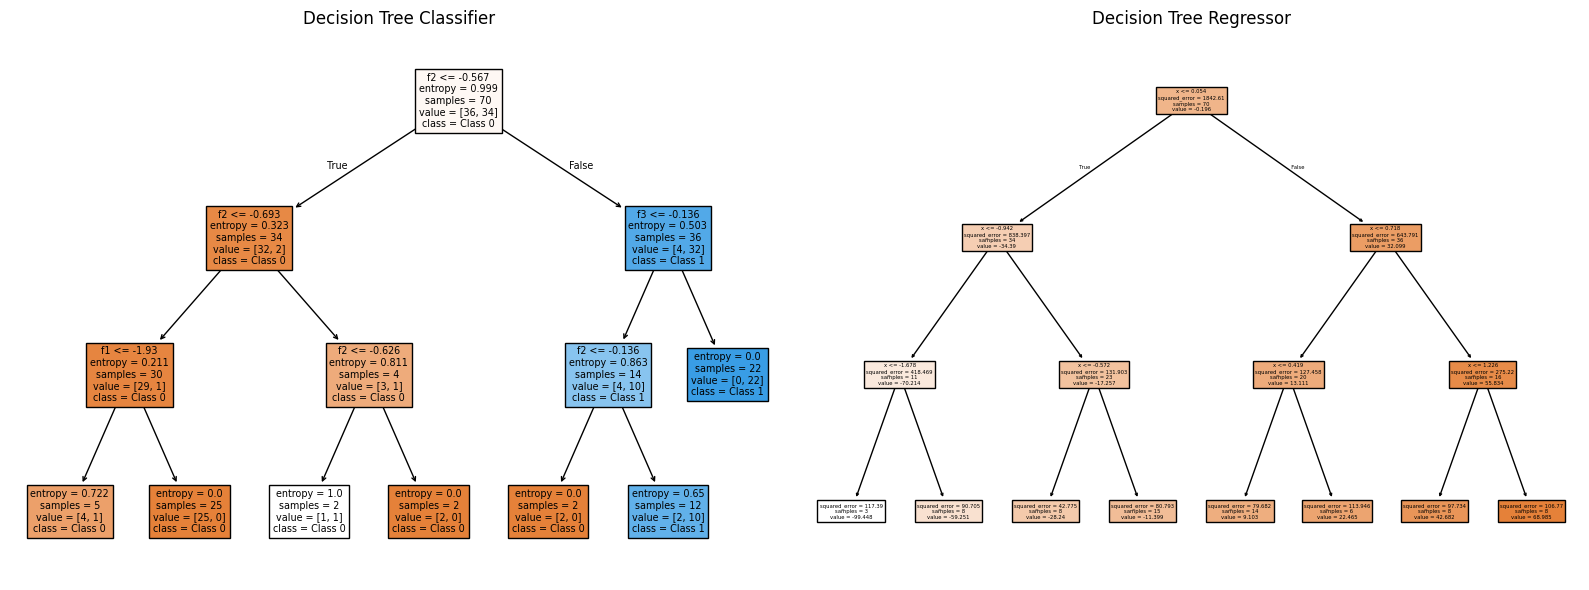

In [ ]:
from sklearn.datasets import make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 분류용 데이터 생성
X_cls, y_cls = make_classification(n_samples=100, n_features=4, random_state=0)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)



# 회귀용 데이터 생성
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


# 분류 모델
clf = DecisionTreeClassifier(
    criterion='entropy',       # 분할 기준 (gini / entropy)
    max_depth=3,               # 최대 트리 깊이
    min_samples_split=4,       # 내부 노드 분할 최소 샘플 수
    min_samples_leaf=2,        # 리프 노드 최소 샘플 수
    random_state=0
)
clf.fit(Xc_train, yc_train)

# 회귀 모델
reg = DecisionTreeRegressor(
    criterion='squared_error', # 손실 기준
    max_depth=3,
    min_samples_split=4,
    min_sam5ples_leaf=2,
    random_state=0
)
reg.fit(Xr_train, yr_train)

# 시각화
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# 분류 트리 시각화
plot_tree(clf, feature_names=[f"f{i}" for i in range(X_cls.shape[1])],
          class_names=['Class 0', 'Class 1'], filled=True, ax=axs[0])
axs[0].set_title("Decision Tree Classifier")

# 회귀 트리 시각화
plot_tree(reg, feature_names=["x"], filled=True, ax=axs[1])
axs[1].set_title("Decision Tree Regressor")

plt.tight_layout()
plt.show()
